In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys, os
import extract as e
import structure as s
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np


In [7]:
from plotting import plots

In [39]:
from dfconvert import df_store

In [40]:
df = df_store('data').load_df()
print(df.head())


Loading pickle: data\data...


100%|██████████████████████████████████████████████████████████████████████████████| 419/419 [00:00<00:00, 4716.20it/s]


dataframe loaded successfully
                     0
2012-01-01  100.546123
2012-01-02  100.776214
2012-01-03  100.178285
2012-01-04  100.312162
2012-01-05  100.489579


In [41]:
len(df)

419

In [36]:
df.columns

Index(['date', 'd1', 'd2', 'd3', 'd4', 'v', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'not_dupym', 'daysinmonth', 'aggdays', 'd1_lag-1'],
      dtype='object')

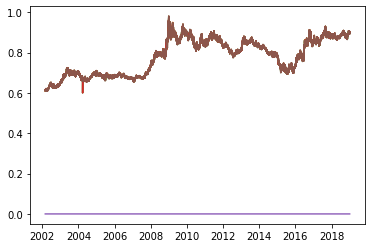

In [11]:
plots(df, None)

In [13]:
from structure import outlier_detect

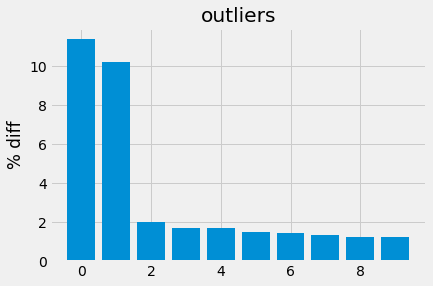

              d3     diff_t
564134   0.60000  11.399994
564135   0.66840  10.233388
4623424  0.90254   2.014316
4537095  0.82504   1.701735
4516317  0.78072   1.688188
4824010  0.84972   1.519325
1902624  0.91530   1.442148
3315239  0.85329   1.353578
4723554  0.88294   1.253767
4517619  0.81924   1.251156


In [14]:
a = outlier_detect(df, 'd3', graph = True)
print(a.outliers)


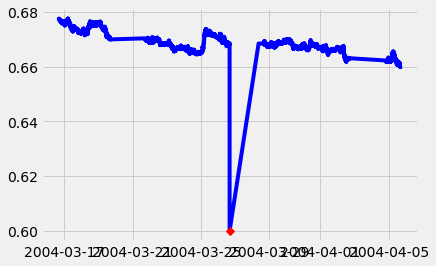

do you wish to remove this observation? (y/n/t to terminate): y


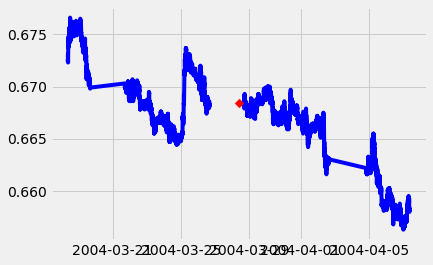

do you wish to remove this observation? (y/n/t to terminate): t


In [15]:
b = a.zoom_in(remove_option=True)


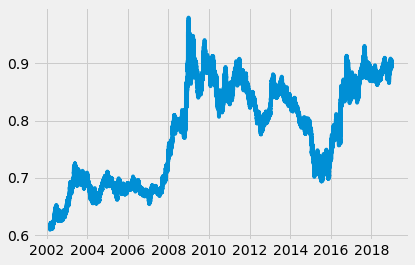

In [16]:
df = b
plots(df, ['d3'], 1)

In [17]:
subset = df.iloc[:100000].reset_index()
subset.head()

,index,date,d1,d2,d3,d4,v,Year,Month,Week,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,d1_lag-1
0,0,2002-03-03 19:04:00,0.6100,0.6100,0.6099,0.6100,0.0,2002,3,9,...,False,False,False,False,False,False,1,0,3,0.6100
1,1,2002-03-03 19:05:00,0.6100,0.6100,0.6099,0.6099,0.0,2002,3,9,...,False,False,False,False,False,False,0,0,3,0.6099
2,2,2002-03-03 19:06:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,...,False,False,False,False,False,False,0,0,3,0.6099
3,3,2002-03-03 19:07:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,...,False,False,False,False,False,False,0,0,3,0.6099
4,4,2002-03-03 19:08:00,0.6099,0.6101,0.6099,0.6101,0.0,2002,3,9,...,False,False,False,False,False,False,0,0,3,0.6099


In [18]:
subset.drop(['index'], axis=1)

,date,d1,d2,d3,d4,v,Year,Month,Week,Day,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,d1_lag-1
0,2002-03-03 19:04:00,0.6100,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,1,0,3,0.6100
1,2002-03-03 19:05:00,0.6100,0.6100,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
2,2002-03-03 19:06:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
3,2002-03-03 19:07:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
4,2002-03-03 19:08:00,0.6099,0.6101,0.6099,0.6101,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
5,2002-03-03 19:09:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6101
6,2002-03-03 19:10:00,0.6101,0.6101,0.6100,0.6101,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6101
7,2002-03-03 19:11:00,0.6101,0.6101,0.6100,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6101
8,2002-03-03 19:12:00,0.6101,0.6101,0.6100,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
9,2002-03-03 19:13:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099


In [19]:
subset = s.add_rand(subset)
subset.head()

C:\Users\luke\Documents\Python Scripts\fanalysis\fanalysis\structure.py:98: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "add_rand" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at C:\Users\luke\Documents\Python Scripts\fanalysis\fanalysis\structure.py (100)

File "structure.py", line 100:
def add_rand(df):
    rand = []
    ^

  @jit
C:\Users\luke\Documents\Python Scripts\fanalysis\fanalysis\structure.py:98: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "add_rand" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "structure.py", line 101:
def add_rand(df):
    <source elided>
    rand = []
    for r in range(len(df)):
    ^

  @jit
c:\users\luke\documents\python scripts\fanalysis\env64\lib\site-packages\numba\compiler.py:725: NumbaWarning: Function "add_rand" was compiled in objec

,index,date,d1,d2,d3,d4,v,Year,Month,Week,...,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,d1_lag-1,randseries
0,0,2002-03-03 19:04:00,0.6100,0.6100,0.6099,0.6100,0.0,2002,3,9,...,False,False,False,False,False,1,0,3,0.6100,0.953715
1,1,2002-03-03 19:05:00,0.6100,0.6100,0.6099,0.6099,0.0,2002,3,9,...,False,False,False,False,False,0,0,3,0.6099,0.864778
2,2,2002-03-03 19:06:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,...,False,False,False,False,False,0,0,3,0.6099,0.901309
3,3,2002-03-03 19:07:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,...,False,False,False,False,False,0,0,3,0.6099,0.163054
4,4,2002-03-03 19:08:00,0.6099,0.6101,0.6099,0.6101,0.0,2002,3,9,...,False,False,False,False,False,0,0,3,0.6099,0.390349


In [20]:
#subset['mean'] = subset.mean(numeric_only=True, axis=1)
subset['mean'] =  df.loc[:,"d1"].mean()

In [21]:
subset.columns

Index(['index', 'date', 'd1', 'd2', 'd3', 'd4', 'v', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'not_dupym', 'daysinmonth', 'aggdays', 'd1_lag-1', 'randseries',
       'mean'],
      dtype='object')

In [22]:
features = pd.get_dummies(subset)

In [23]:
features.iloc[:, 5:20].head()

,d4,v,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym
0,0.6100,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,1
1,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0
2,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0
3,0.6100,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0
4,0.6101,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0


In [24]:
def drop_col(df, col_names):
    for col in col_names:
        if col in df.columns:
            df = df.drop(col, axis = 1)
    return df

features = drop_col(features, ['date', 'd2', 'd3', 'd4', 'index', 'd1_lag-1'])

In [25]:
features.head()

,d1,v,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,randseries,mean
0,0.6100,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,1,0,3,0.953715,0.791402
1,0.6100,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0,0,3,0.864778,0.791402
2,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0,0,3,0.901309,0.791402
3,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0,0,3,0.163054,0.791402
4,0.6099,0.0,2002,3,9,3,6,62,False,False,False,False,False,False,0,0,3,0.390349,0.791402


In [26]:
if 'd1' in features:
    labels = np.array(features['d1'])
    features = features.drop('d1', axis = 1)
elif 'rnd' in features:
    labels = np.array(features['rnd'])
    features = features.drop('rnd', axis = 1)

feature_list = list(features.columns)
print(feature_list)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state=42)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

['v', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'not_dupym', 'daysinmonth', 'aggdays', 'randseries', 'mean']
(75000, 18)
(25000, 18)
(75000,)
(25000,)


In [27]:
#historical average
baseline_preds = test_features[:,feature_list.index('mean')]
print(baseline_preds)
baseline_errors = abs(baseline_preds - test_labels)
baseline_errors[:10]


[0.7914015054702759 0.7914015054702759 0.7914015054702759 ...
 0.7914015054702759 0.7914015054702759 0.7914015054702759]


array([0.1633015275001526, 0.15750151872634888, 0.17760151624679565,
       0.16070151329040527, 0.15330147743225098, 0.15950149297714233,
       0.15130150318145752, 0.1593015193939209, 0.15170150995254517,
       0.14740151166915894], dtype=object)

In [28]:
print('av basline error: ', round(np.mean(baseline_errors), 2))


av basline error:  0.16


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('mean absolute error: ', np.mean(errors), 'degrees.')


mean absolute error:  0.0010836894851715385 degrees.


In [30]:
from sklearn.tree import export_graphviz 
#from sklearn.tree import pydot
#import pydot
import pydotplus
#from sklearn import pydot



In [31]:
tree= rf.estimators_[3]
export_graphviz(tree, out_file = 'tree.dot', feature_names=feature_list, rounded = True, precision=1)
graph = pydotplus.graph_from_dot_file('tree.dot')

In [32]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('accuracy:', round(accuracy, 2), '%.')

accuracy: 99.83 %.


In [33]:
importances = list(rf.feature_importances_)
print(importances)
feature_importances = [(feature, importance) for feature, importance in zip (feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('variable: {:20} importance : {}'.format(*pair)) for pair in feature_importances if pair[1] != 0]

[0.0, 0.0, 0.0, 0.0007342940543356847, 0.013790886471217642, 0.0008903295636972298, 0.5670152832397359, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.708640999799079e-08, 0.0027047059202384726, 0.4148631232006475, 1.2904637174847268e-06, 0.0]
variable: Dayofyear            importance : 0.5670152832397359
variable: aggdays              importance : 0.4148631232006475
variable: Day                  importance : 0.013790886471217642
variable: daysinmonth          importance : 0.0027047059202384726
variable: Dayofweek            importance : 0.0008903295636972298
variable: Week                 importance : 0.0007342940543356847
variable: randseries           importance : 1.2904637174847268e-06
variable: not_dupym            importance : 8.708640999799079e-08


[None, None, None, None, None, None, None, None]

In [34]:
important_indices = [feature_list.index('Dayofweek'), feature_list.index('mean')]
train_important=train_features[:,important_indices]
test_important=test_features[:,important_indices]
rf.fit(train_important, train_labels)
predictions= rf.predict(test_important)
errors = abs(predictions-test_labels)
print(errors)

[0.00870684 0.00453111 0.01473195 ... 0.00507992 0.0155006  0.00946889]


Text(0.5, 1.0, 'var importance')

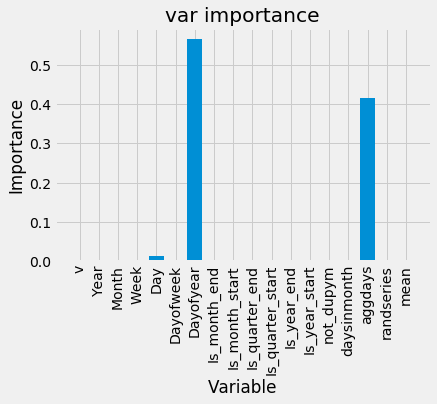

In [35]:
plt.style.use('fivethirtyeight')
x_values=list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('var importance')



In [ ]:
years = test_features[:, feature_list.index('Year')]
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
print("YEARS: " , years)
print("MONTHS: " , months)
print("DAYS: " , days)



In [ ]:
np.unique(test_features[:, feature_list.index('Year')])

In [ ]:
test_dates = [str(int(year)) + '-' + str(int(month))+'-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
prediction_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})


In [ ]:
prediction_data.head()

In [ ]:
# Plot the actual values
plt.plot(subset['date'], subset['d1'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(prediction_data['date'], prediction_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('rate'); plt.title('Actual and Predicted Values');